# problem6

This post is inspired by [this 3blue1brown video](https://www.youtube.com/watch?v=OkmNXy7er84&t=1s) which looks at question A6 on the [1992 Putnam](http://www.math.hawaii.edu/~dale/putnam/1992.pdf)

The question is 

>Four points are chosen independently and at random on the surface of a sphere (using the uniform distribution). What is the probability that the center of the sphere lies inside the resulting tetrahedron?

We will look first look at this question in 2-dimensions, that question

>Three points are chosen independently and at random on the surface of a circle. What is the probability that the center of the circle lies inside the resulting triangle?

## How to check if a point is enclosed in within a polygon?

We will use a generalized version of the method described [here](http://steve.hollasch.net/cgindex/geometry/ptintet.html)

This method extends to many dimensions but, in two dimensions, it looks like the following

Given a triangle's vertices and a point $p$

$v1 = (x_1, y_1)$

$v2 = (x_2, y_2)$

$v3 = (x_3, y_3)$

$p = (x_p, y_p)$

The point $p$ is contained within the triangle if the sign of the determinant of all of the following matrices are the same

$
D_0 = 
 \begin{pmatrix}
  x_1 & y_1 & 1 \\
  x_2 & y_2 & 1 \\
  x_3 & y_3 & 1
 \end{pmatrix}
$

$
D_1 = 
 \begin{pmatrix}
  x_p & y_p & 1 \\
  x_2 & y_2 & 1 \\
  x_3 & y_3 & 1
 \end{pmatrix}
$

$
D_2 = 
 \begin{pmatrix}
  x_1 & y_1 & 1 \\
  x_p & y_p & 1 \\
  x_3 & y_3 & 1
 \end{pmatrix}
$

$
D_3 = 
 \begin{pmatrix}
  x_1 & y_1 & 1 \\
  x_2 & y_2 & 1 \\
  x_p & y_p & 1
 \end{pmatrix}
$

In [1]:
from copy import copy, deepcopy
from typing import List, Union

import numpy as np

def contains(point: np.ndarray, vertices: List[np.ndarray]):
    """Returns whether point is contained within the given vertices

    Uses a generalized version of this method

    http://steve.hollasch.net/cgindex/geometry/ptintet.html
    """

    if len(point) + 1 != len(vertices):
        raise ValueError("Required that num vertices = dimension + 1")

    for vertex in vertices:
        if len(vertex) != len(point):
            raise ValueError("Dimension of point and vertices do not match")

    # create the matrix D0 above with each vertex stacked vertically
    # and the right-most column filled with 1s
    d0 = deepcopy(vertices)
    d0 = [np.append(vertex, 1) for vertex in d0]

    dimension = len(point)

    # generate a list of the determinants of the matrices described above
    determinants = [np.linalg.det(d0)]

    # create each matrix d1...dn and store the determinant
    for i in range(0, dimension+1):
        d_matrix = copy(d0)
        d_matrix[i] = np.append(point, 1)
        determinants.append(np.linalg.det(d_matrix))

    # return whether the sign of all determinants are the same
    return all(np.sign(det) == np.sign(determinants[0]) for det in determinants)

Let's test our implementation by creating a right triangle with vertices $(0, 1)$, $(0, 0)$, and $(1, 0)$ and test that the point $(0.2, 0.2)$ is contained within our triangle while the point $(0.6, 0.6)$ is not.

In [2]:
p1 = np.array([0, 0])
p2 = np.array([1, 0])
p3 = np.array([0, 1])
vertices = [p1, p2, p3]

point = np.array([0.2, 0.2])

assert contains(point, vertices)

point = np.array([0.6, 0.6])
assert not contains(point, vertices)

## Generating a Random Point with Unit Length

We can generate random points with length one by creating a vector of random numbers and dividing by the vector's norm. We'll use this to generate random points on the unit circle and unit sphere in order to check whether the origin is enclosed within our random points.

In [3]:
def random_unit_point(dimension: int) -> np.ndarray:
    """Generate a random point with length 1 for the given dimension
    
    random_unit_point(dimension=2) returns a random point on the unit circle
    random_unit_point(dimension=3) returns a random point on the unit sphere
    """
    vec = np.array([np.random.randn() for _ in range(dimension)])
    return vec / np.linalg.norm(vec)

## Helper Methods

We'll create a class to store three vertices that implements the magic `__contains__` method allowing us to write statements like `point in triangle` to check whether a 2D point is enclosed within the triangle formed by the three vertices. We'll create an additional helper function named `Point2D` that returns an `np.array` of length 2 

In [4]:
class Triangle:

    def __init__(self, p1: np.ndarray, p2: np.ndarray, p3: np.ndarray):
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3

    def __contains__(self, point: np.ndarray) -> bool:
        return contains(point, [self.p1, self.p2, self.p3])


class Point(np.ndarray):

    def __new__(cls, input_array):
        obj = np.asarray(input_array).view(cls)
        return obj

    @property
    def x(self):
        return self[0]

    @property
    def y(self):
        return self[1]

    @property
    def z(self):
        return self[2]

In [5]:
test = Point([1, 2])

In [6]:
p1 = Point([0, 0])
p2 = Point([1, 0])
p3 = Point([0, 1])

assert Point([0.2, 0.2]) in Triangle(p1, p2 , p3)
assert Point([0.6, 0.6]) not in Triangle(p1, p2 , p3)

p2 = Point([-1, 0])
p3 = Point([0, -1])
assert Point([-0.2, -0.2]) in Triangle(p1, p2 , p3)
assert Point([-0.2, 0.2]) not in Triangle(p1, p2 , p3)

## Generate 3 random points on unit circle

Generate 3 random x between -1 and 1, then pick from 1 of 2 possible Y values

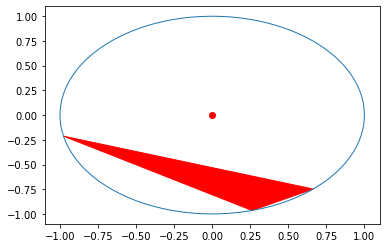

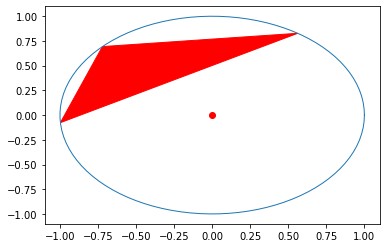

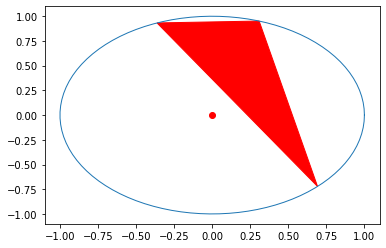

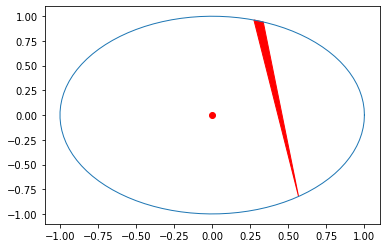

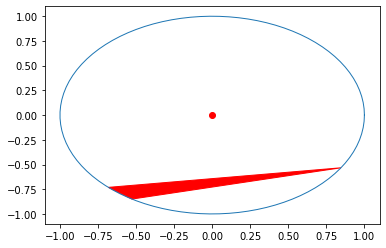

In [7]:
%matplotlib inline

import math
import random
import time

import numpy as np
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

origin = Point([0, 0])

for _ in range(5):

    p1 = random_unit_point(dimension=2)
    p2 = random_unit_point(dimension=2)
    p3 = random_unit_point(dimension=2)

    t = np.linspace(0, np.pi*2,100)
    plt.plot(np.cos(t), np.sin(t), linewidth=1)
    plt.plot(origin.x, origin.y, 'ro')

    color = 'blue' if origin in Triangle(p1, p2, p3) else 'red'

    t1 = plt.Polygon([p1, p2, p3], color=color)
    plt.gca().add_patch(t1)
    plt.show()

In [8]:
origin = Point([0, 0])

num_runs = 10**5
times_origin_in_triangle = 0

for _ in range(num_runs):
    p1 = random_unit_point(dimension=2)
    p2 = random_unit_point(dimension=2)
    p3 = random_unit_point(dimension=2)

    t = Triangle(p1, p2, p3)

    times_origin_in_triangle += origin in t

In [9]:
print(f"Origin lies within random triangle on the unit circle "
      f"{100 * times_origin_in_triangle / num_runs}% of the time")

Origin lies within random triangle on the unit circle 24.935% of the time


### 3D Case

In [10]:
class Tetrahedron:

    def __init__(self, p1: np.ndarray, p2: np.ndarray, p3: np.ndarray, p4: np.ndarray):
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3
        self.p4 = p4

    def __contains__(self, point: np.ndarray) -> bool:
        """Returns whether point is contained within tetrahedron"""
        return contains(point, [self.p1, self.p2, self.p3, self.p4])

In [11]:
p1 = Point([0, 0, 0])
p2 = Point([1, 0, 0])
p3 = Point([0, 1, 0])
p4 = Point([0, 0, 1])
t = Tetrahedron(p1, p2, p3, p4)
assert Point([0.01, 0.01, 0.01]) in t
assert Point([0.5, 0.5, 0.5]) not in t

In [12]:
origin = Point([0, 0, 0])

num_runs = 10**5
num_times_origin_contained = 0

for _ in range(num_runs):
    p1 = random_unit_point(dimension=3)
    p2 = random_unit_point(dimension=3)
    p3 = random_unit_point(dimension=3)
    p4 = random_unit_point(dimension=3)

    t = Tetrahedron(p1, p2, p3, p4)
    num_times_origin_contained += origin in t

print(
    f"Origin lies within random tetrahedron on the unit sphere "
    f"{100 * num_times_origin_contained / num_runs}% of the time"
)

Origin lies within random tetrahedron on the unit sphere 12.384% of the time
